In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [66]:
df = pd.read_csv('aug_train.csv')

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## EDA

## Nomor 1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Analisa: **Seluruh kolom sudah memenuhi tipe data yang sesuai**

In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Analisa: **Kolom gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job memiliki nilai kosong**

In [23]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [25]:
# Menerapkan describe() pada kolom-kolom kategorikal
describe_categorical = data.describe(include=['object'])

# Menampilkan hasil
describe_categorical

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,14650,14650,14650,14437,14391,12672,14634,10337,10217,14576
unique,122,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,3579,13221,10933,10982,9029,11188,2799,2362,7728,6170


Analisa: **tidak ada data yang aneh dari dataset ini**

## Nomor 2

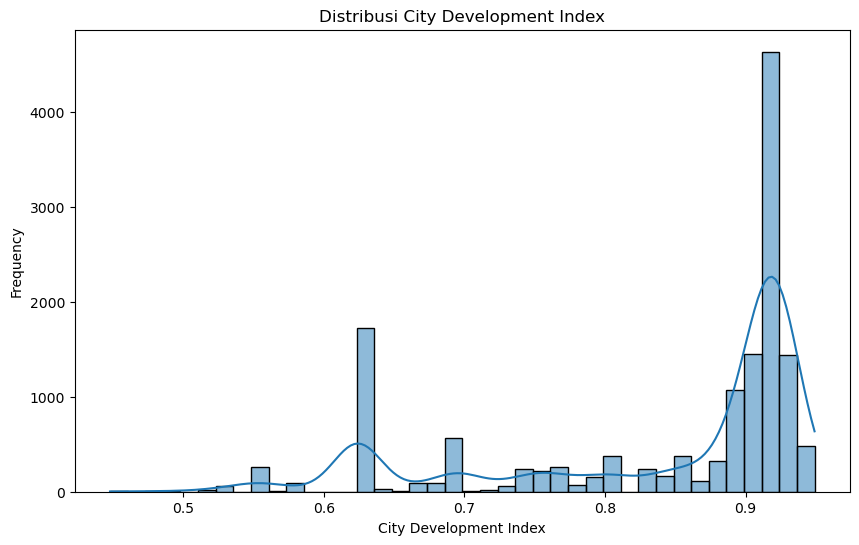

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['city_development_index'], kde=True)
plt.title('Distribusi City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Mengukur skewness dari 'city_development_index'
skewness = skew(df['city_development_index'])

# Menampilkan hasil
print(f"Skewness dari City Development Index: {skewness}")

Skewness dari City Development Index: -0.9953495952364606


Analisa: **Skewness dari City Development Index: -0.9953495952364606 (Skew Negative)**

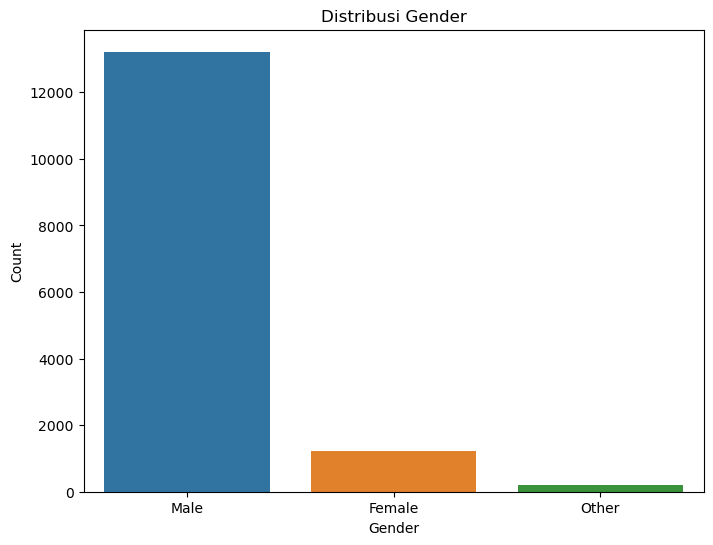

In [34]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['gender'])
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi gender pria terlalu mendominasi**

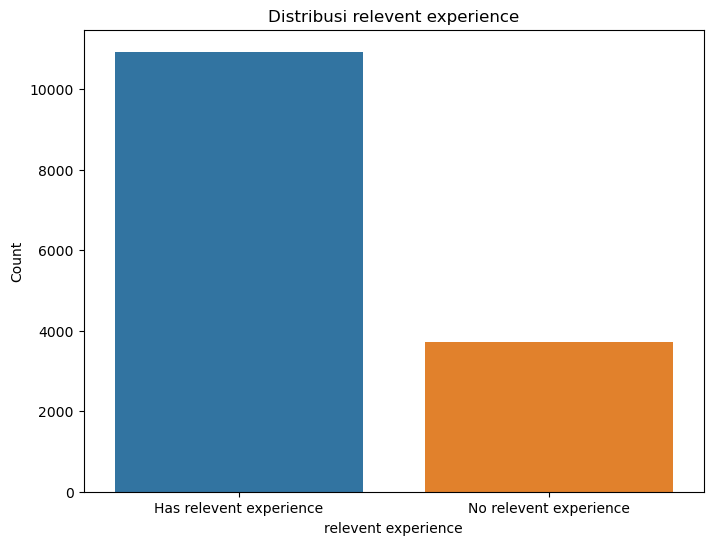

In [36]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['relevent_experience'])
plt.title('Distribusi relevent experience')
plt.xlabel('relevent experience')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi Has relevent experience terlalu mendominasi**

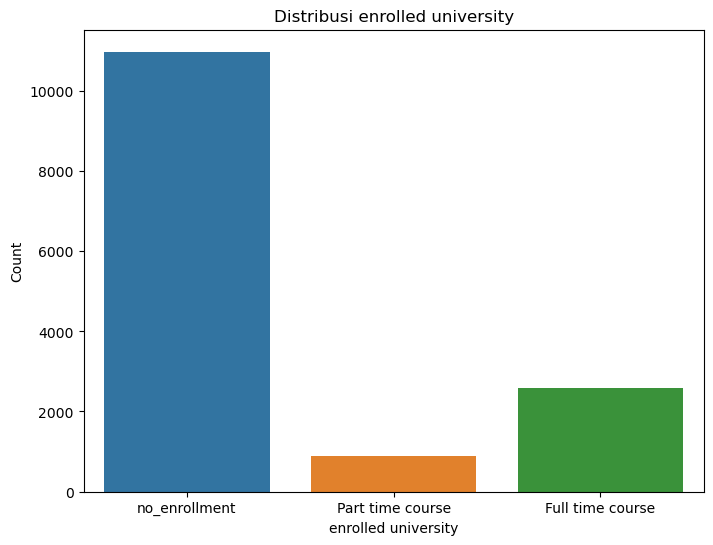

In [38]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['enrolled_university'])
plt.title('Distribusi enrolled university')
plt.xlabel('enrolled university')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi no_enrollment terlalu mendominasi**

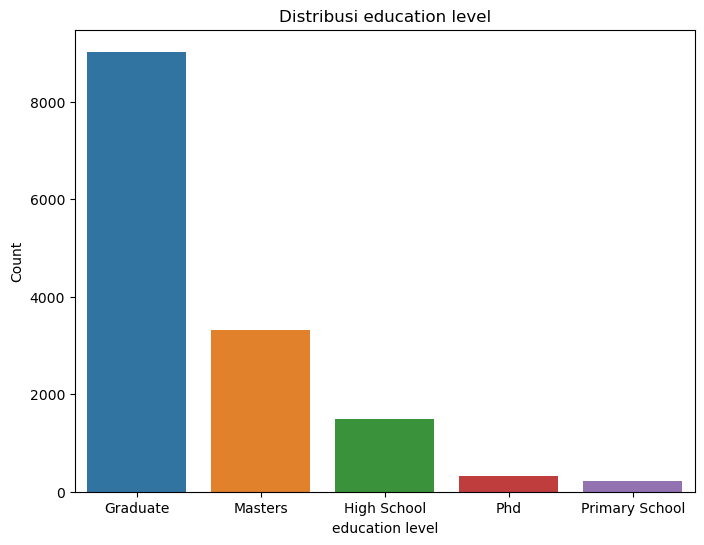

In [40]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['education_level'])
plt.title('Distribusi education level')
plt.xlabel('education level')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi Graduate mendominasi**

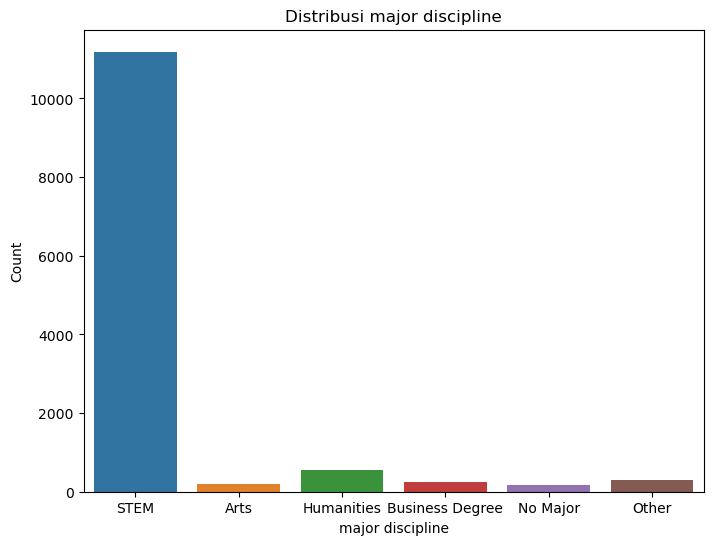

In [41]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['major_discipline'])
plt.title('Distribusi major discipline')
plt.xlabel('major discipline')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi STEM mendominasi**

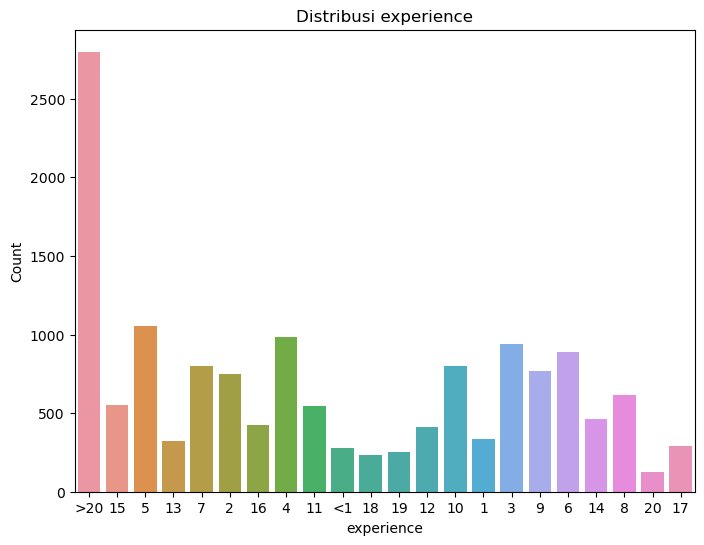

In [43]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['experience'])
plt.title('Distribusi experience')
plt.xlabel('experience')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi >20 mendominasi**

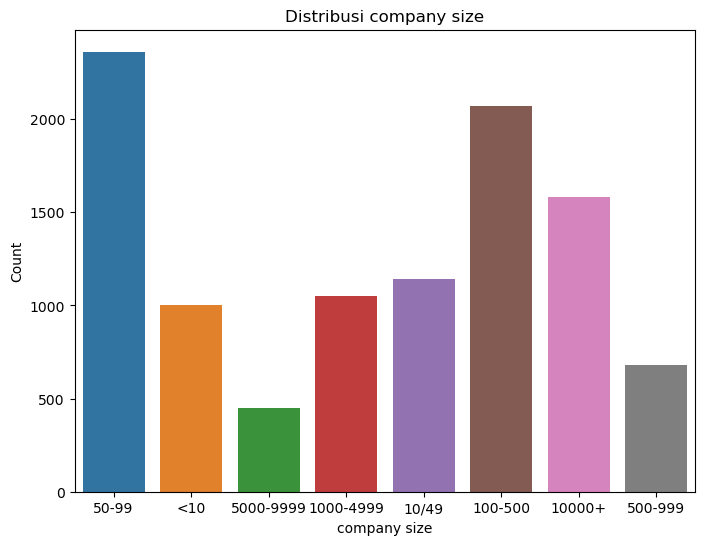

In [44]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['company_size'])
plt.title('Distribusi company size')
plt.xlabel('company size')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi yang terbanyak berada di 50-500**

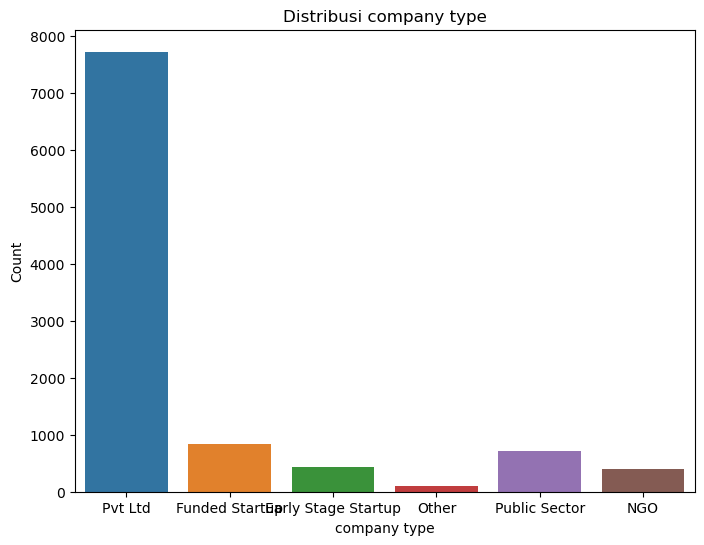

In [45]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['company_type'])
plt.title('Distribusi company type')
plt.xlabel('company type')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi Pvt ltd mendominasi**

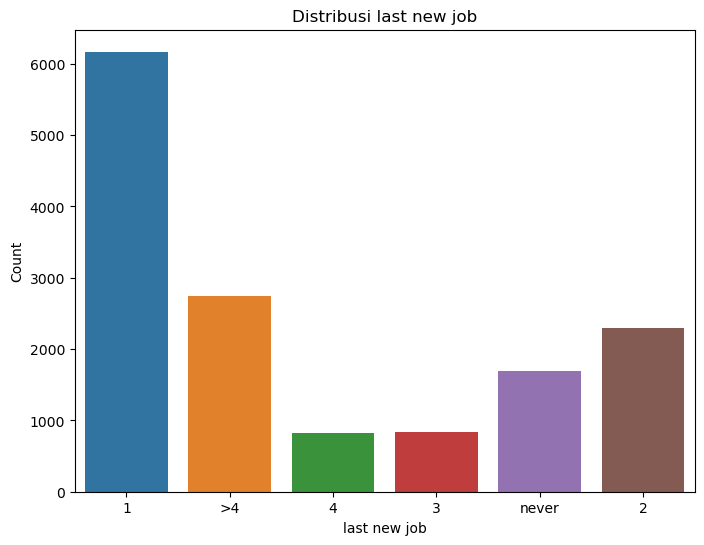

In [47]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['last_new_job'])
plt.title('Distribusi last new job')
plt.xlabel('last new job')
plt.ylabel('Count')
plt.show()

Analisa: **Distribusi yang pengalaman 1 tahun dari perusahaan sebelum dan baru mendominasi**

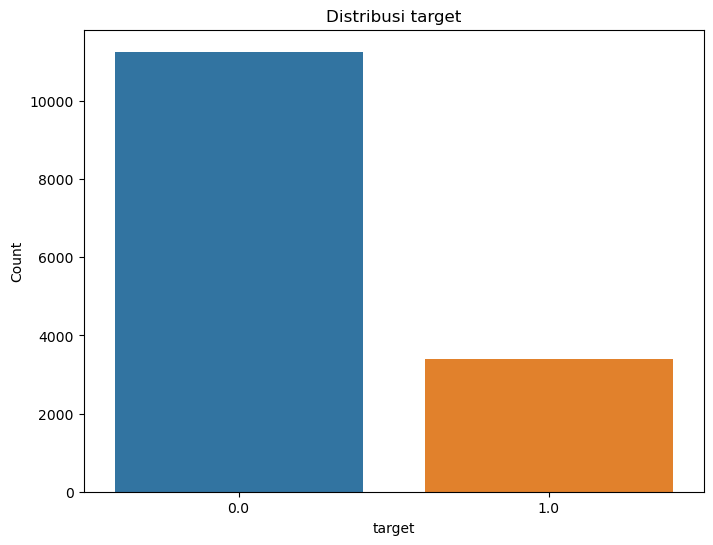

In [49]:
# Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(x=data['target'])
plt.title('Distribusi target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

Analisa: **Terjadi Imbalance data dimana target 0 lebih banyak dibandingkan target 1**

## Nomor 3

C:\Users\ACER\AppData\Local\Temp\ipykernel_29380\2245146507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


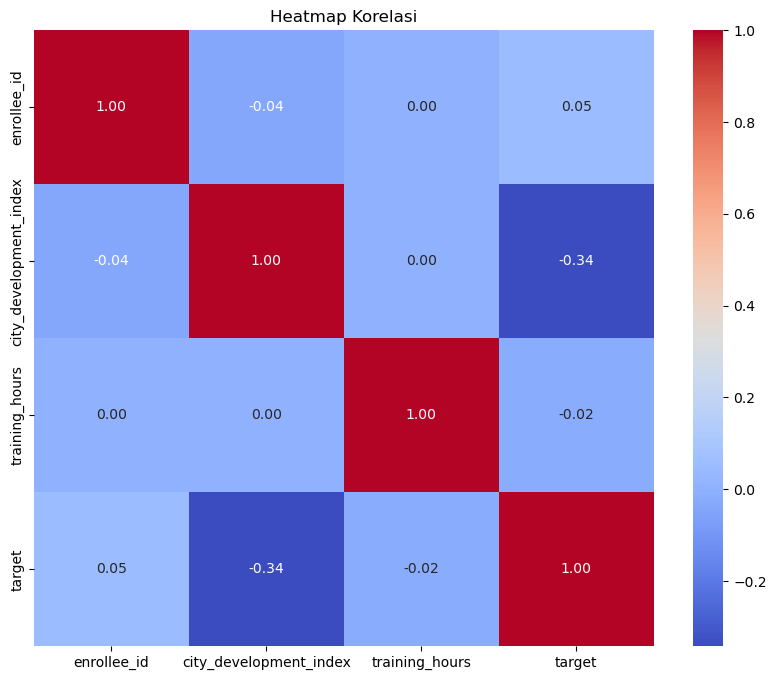

In [50]:
# Menghitung korelasi antar variabel numerik
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

Analisa: **city_development_index memiliki korelasi negatif kuat sedangkan training_hours memiliki korelasi negatif lemah terhadap target(label)**

Analisa: 
**Statistik Chi-Square ini menunjukkan bahwa ada perbedaan yang signifikan antara distribusi observasi yang diamati dan distribusi yang diharapkan jika 'major_discipline' dan 'target' adalah independen.**

**Nilai P sekitar 0.0321 menunjukkan bahwa terdapat bukti statistik yang cukup untuk menolak hipotesis nol pada tingkat signifikansi 0.05. Artinya, variabel 'major_discipline' dan 'target' tidak independen satu sama lain. Ada hubungan yang signifikan antara keduanya.**

In [92]:
nama_kolom = df.columns

# Inisialisasi list untuk menyimpan hasil uji Chi-Square
hasil_chi_square = []

# Lakukan uji Chi-Square untuk setiap kolom
for kolom in nama_kolom[1:11]:
    contingency_table = pd.crosstab(df[kolom], df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    hasil_chi_square.append((kolom, chi2, p))
    
# Urutkan hasil berdasarkan nilai Chi-Square dan P-value
hasil_chi_square = sorted(hasil_chi_square, key=lambda x: (x[1], x[2]))
hasil_chi_square = hasil_chi_square[::-1]

# Tampilkan hasil
print("berikut kolom dengan korelasi paling kuat ke yang paling lemah:")
for kolom, chi2, p in hasil_chi_square:
    print(f"Kolom: {kolom}")
    print(f"Uji Chi-Square: {chi2}\n")

berikut kolom dengan korelasi paling kuat ke yang paling lemah:
Kolom: city
Uji Chi-Square: 2998.7772290703606

Kolom: city_development_index
Uji Chi-Square: 2969.326767516281

Kolom: experience
Uji Chi-Square: 701.5739628056695

Kolom: enrolled_university
Uji Chi-Square: 455.16676201857496

Kolom: relevent_experience
Uji Chi-Square: 315.33857672021657

Kolom: education_level
Uji Chi-Square: 165.65538908718997

Kolom: company_size
Uji Chi-Square: 45.53175529315902

Kolom: company_type
Uji Chi-Square: 35.03547546070745

Kolom: major_discipline
Uji Chi-Square: 12.207121063439176

Kolom: gender
Uji Chi-Square: 9.0421817403733



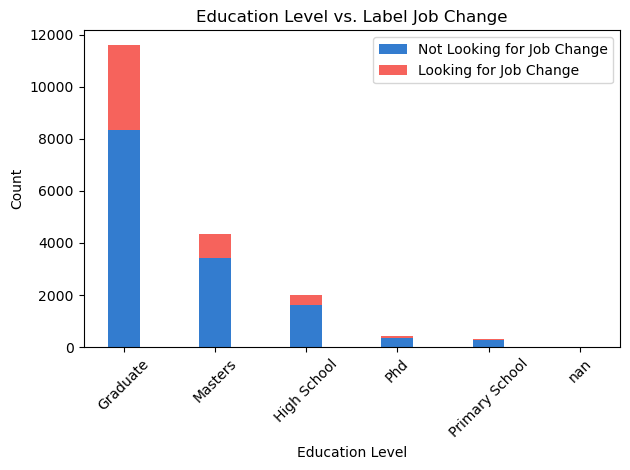

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Mendapatkan kategori education_level unik
categories = df['education_level'].unique()

# Inisialisasi array untuk label 0 dan 1
target_0 = []
target_1 = []

# Mengisi array dengan data yang sesuai
for category in categories:
    target_0.append(df[(df['education_level'] == category) & (df['target'] == 0)]['education_level'].count())
    target_1.append(df[(df['education_level'] == category) & (df['target'] == 1)]['education_level'].count())

# Mendapatkan indeks yang mengurutkan target_1 dari besar ke kecil
sorted_indices = np.argsort(target_1)[::-1]

# Mengurutkan categories, target_0, dan target_1 berdasarkan sorted_indices
categories = categories[sorted_indices]
target_0 = np.array(target_0)[sorted_indices]
target_1 = np.array(target_1)[sorted_indices]

    
# Mengubah list menjadi array numpy
target_0 = np.array(target_0)
target_1 = np.array(target_1)

x = range(len(categories))  # Label kategori company_type
width = 0.35  # Lebar batang

fig, ax = plt.subplots()

# Membuat stacked bar plot
rects1 = ax.bar(x, target_0, width, label='Not Looking for Job Change', color = '#337CCF')
rects2 = ax.bar(x, target_1, width, bottom=target_0, label='Looking for Job Change', color = '#F6635C')

# Menambahkan label, judul, dan menyesuaikan sumbu x
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.set_title('Education Level vs. Label Job Change')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Menambahkan label nilai pada batang
#def autolabel(rects):
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 poin di atas label
#                    textcoords="offset points",
#                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()


Rekomendasi:
**Pada education level Graduate diperlukan treatment seperti Program Rotasi Pekerjaan, Monitoring dan Umpan Balik Reguler, dan Survei dan Wawancara Keluar untuk menghindari pegawai keluar dimasa mendatang**

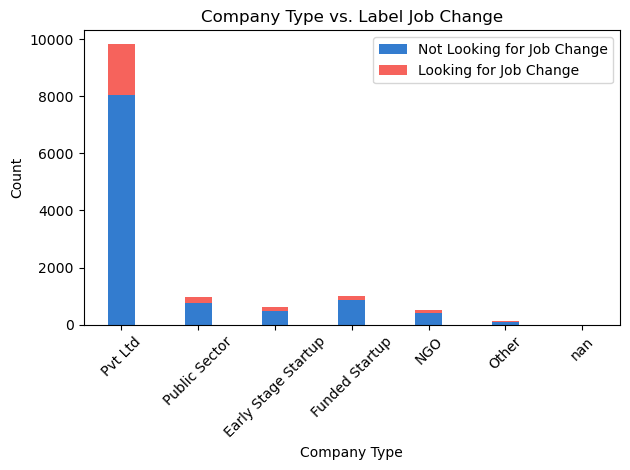

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Mendapatkan kategori education_level unik
categories = df['company_type'].unique()

# Inisialisasi array untuk label 0 dan 1
target_0 = []
target_1 = []

# Mengisi array dengan data yang sesuai
for category in categories:
    target_0.append(df[(df['company_type'] == category) & (df['target'] == 0)]['company_type'].count())
    target_1.append(df[(df['company_type'] == category) & (df['target'] == 1)]['company_type'].count())

# Mendapatkan indeks yang mengurutkan target_1 dari besar ke kecil
sorted_indices = np.argsort(target_1)[::-1]

# Mengurutkan categories, target_0, dan target_1 berdasarkan sorted_indices
categories = categories[sorted_indices]
target_0 = np.array(target_0)[sorted_indices]
target_1 = np.array(target_1)[sorted_indices]

    
# Mengubah list menjadi array numpy
target_0 = np.array(target_0)
target_1 = np.array(target_1)

x = range(len(categories))  # Label kategori company_type
width = 0.35  # Lebar batang

fig, ax = plt.subplots()

# Membuat stacked bar plot
rects1 = ax.bar(x, target_0, width, label='Not Looking for Job Change', color = '#337CCF')
rects2 = ax.bar(x, target_1, width, bottom=target_0, label='Looking for Job Change', color = '#F6635C')

# Menambahkan label, judul, dan menyesuaikan sumbu x
ax.set_xlabel('Company Type')
ax.set_ylabel('Count')
ax.set_title('Company Type vs. Label Job Change')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Menambahkan label nilai pada batang
#def autolabel(rects):
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 poin di atas label
#                    textcoords="offset points",
#                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()


Rekomendasi:
**Pada Company Type Pvt Ltd diperlukan treatment seperti Fleksibilitas dalam Karir, Pengembangan Keterampilan Tambahan, dan Pengakuan serta Penghargaan untuk menghindari pegawai keluar dimasa mendatang**

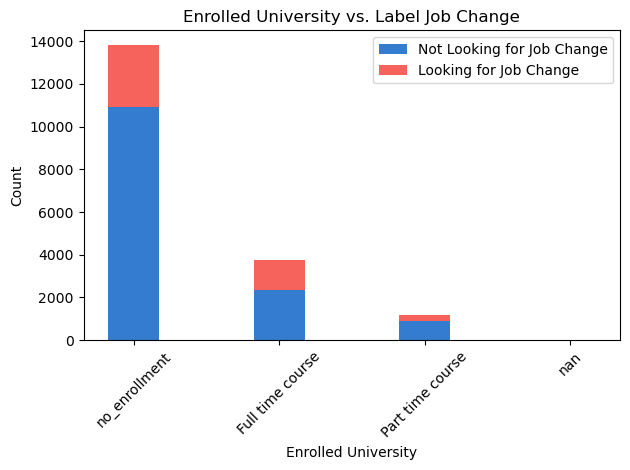

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Mendapatkan kategori education_level unik
categories = df['enrolled_university'].unique()

# Inisialisasi array untuk label 0 dan 1
target_0 = []
target_1 = []

# Mengisi array dengan data yang sesuai
for category in categories:
    target_0.append(df[(df['enrolled_university'] == category) & (df['target'] == 0)]['enrolled_university'].count())
    target_1.append(df[(df['enrolled_university'] == category) & (df['target'] == 1)]['enrolled_university'].count())

# Mendapatkan indeks yang mengurutkan target_1 dari besar ke kecil
sorted_indices = np.argsort(target_1)[::-1]

# Mengurutkan categories, target_0, dan target_1 berdasarkan sorted_indices
categories = categories[sorted_indices]
target_0 = np.array(target_0)[sorted_indices]
target_1 = np.array(target_1)[sorted_indices]

    
# Mengubah list menjadi array numpy
target_0 = np.array(target_0)
target_1 = np.array(target_1)

x = range(len(categories))  # Label kategori company_type
width = 0.35  # Lebar batang

fig, ax = plt.subplots()

# Membuat stacked bar plot
rects1 = ax.bar(x, target_0, width, label='Not Looking for Job Change', color = '#337CCF')
rects2 = ax.bar(x, target_1, width, bottom=target_0, label='Looking for Job Change', color = '#F6635C')

# Menambahkan label, judul, dan menyesuaikan sumbu x
ax.set_xlabel('Enrolled University')
ax.set_ylabel('Count')
ax.set_title('Enrolled University vs. Label Job Change')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Menambahkan label nilai pada batang
#def autolabel(rects):
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 poin di atas label
#                    textcoords="offset points",
#                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()
